# 🏥 Healthcare Insurance Cost Analysis  
### ⚙️ Notebook 03 – Feature Engineering  
| Feild | Description |
|-------|-------------|
|**Author:** |Robert Steven Elliott  |
|**Course:** |Code Institute – Data Analytics with AI Bootcamp |  
|**Project Type:** |Individual Formative Project  | 
|**Date:** |October 2025  |

---

### **Objectives**
- Create new features that provide deeper analytical insight.  
- Derive BMI category, age group, and family size category variables.  
- Save the enriched dataset for visualisation and analysis.

### **Inputs**
- `data/processed/insurance_clean.csv`  

### **Outputs**
- `data/processed/insurance_enriched.csv`  
- Updated DataFrame with derived features.

### **Additional Comments**
Ensure this notebook is run after `02_data_cleaning_and_transformation.ipynb`.  
All added features should be clearly documented and reproducible.


---

# Change Working Directory

In [1]:
import os
PROJECT_ROOT = os.path.join(os.getcwd(), "..")
os.chdir(PROJECT_ROOT)
print("✅ Working directory set to project root:", os.getcwd())

✅ Working directory set to project root: /home/robert/Projects/health-insurance-cost-analysis


---

# Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# Load Cleaned Dataset

In [3]:
data_path = "data/processed/insurance_clean.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✅ Cleaned dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    raise FileNotFoundError("❌ Cleaned dataset not found. Please run Notebook 02 first.")

display(df.head())

✅ Cleaned dataset loaded successfully. Shape: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

# Create BMI categories

In [4]:
# Create BMI category bins
bmi_bins = [0, 18.5, 24.9, 29.9, 39.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']

df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

print("✅ Added BMI category column.")
display(df[['bmi', 'bmi_category']].head(10))

✅ Added BMI category column.


,bmi,bmi_category
0,27.900,Overweight
1,33.770,Obese
2,33.000,Obese
3,22.705,Normal
4,28.880,Overweight
5,25.740,Overweight
6,33.440,Obese
7,27.740,Overweight
8,29.830,Overweight
9,25.840,Overweight


---

# Create Age Groups

In [5]:
# Create age group bins
age_bins = [17, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

print("✅ Added age group column.")
display(df[['age', 'age_group']].head(10))


✅ Added age group column.


,age,age_group
0,19,18-25
1,18,18-25
2,28,26-35
3,33,26-35
4,32,26-35
5,31,26-35
6,46,46-55
7,37,36-45
8,37,36-45
9,60,56-65


# Create Family Size Groups

In [6]:
# Create a categorical variable for number of children
family_bins = [-1, 0, 2, 4, 10]
family_labels = ['No Children', 'Small Family', 'Medium Family', 'Large Family']

df['family_size_category'] = pd.cut(df['children'], bins=family_bins, labels=family_labels)

print("✅ Added family size category column.")
display(df[['children', 'family_size_category']].head(10))


✅ Added family size category column.


,children,family_size_category
0,0,No Children
1,1,Small Family
2,3,Medium Family
3,0,No Children
4,0,No Children
5,0,No Children
6,1,Small Family
7,3,Medium Family
8,2,Small Family
9,0,No Children


---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1337 non-null   int64   
 1   sex                   1337 non-null   object  
 2   bmi                   1337 non-null   float64 
 3   children              1337 non-null   int64   
 4   smoker                1337 non-null   object  
 5   region                1337 non-null   object  
 6   charges               1337 non-null   float64 
 7   bmi_category          1337 non-null   category
 8   age_group             1337 non-null   category
 9   family_size_category  1337 non-null   category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 77.8+ KB


# Validate Derived Features

In [8]:
# Confirm new columns were created correctly
print("🧩 Derived columns added:")
print(df[['bmi_category', 'age_group', 'family_size_category']].describe(include='category'))

# Check for missing or invalid values
print("\n🔍 Missing values check:")
print(df[['bmi_category', 'age_group', 'family_size_category']].isnull().sum())


🧩 Derived columns added:
       bmi_category age_group family_size_category
count          1337      1337                 1337
unique            5         5                    4
top           Obese     18-25          No Children
freq            622       305                  573

🔍 Missing values check:
bmi_category            0
age_group               0
family_size_category    0
dtype: int64


---

# Save Enriched Dataset

In [9]:
output_path = "data/final/insurance_final.csv"
df.to_csv(output_path, index=False)
print(f"📁 Enriched dataset saved to: {output_path}")

📁 Enriched dataset saved to: data/final/insurance_final.csv


---

# Quick Summary Visual Check

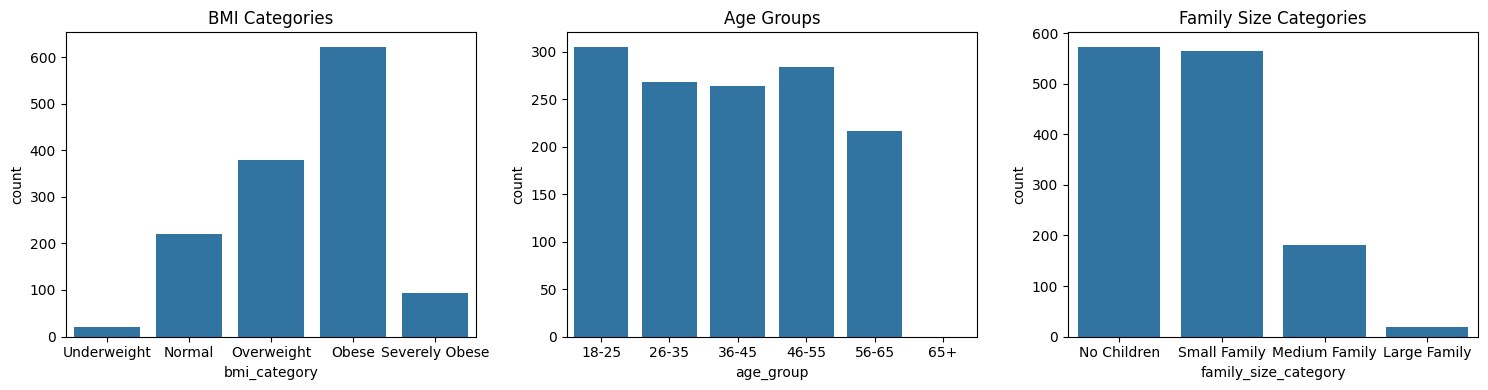

In [10]:
# Count plots for new features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(data=df, x='bmi_category', ax=axes[0])
axes[0].set_title('BMI Categories')

sns.countplot(data=df, x='age_group', ax=axes[1])
axes[1].set_title('Age Groups')

sns.countplot(data=df, x='family_size_category', ax=axes[2])
axes[2].set_title('Family Size Categories')

plt.tight_layout()
plt.show()